In [40]:
import pandas as pd
import scipy.stats as ss
import statsmodels.api as sm
import math as mt
#import ramdom 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#next, let's have a look at our dataset:
ab_test_data_import  = pd.read_csv('ab_data.csv')
ab_test_data_import

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [24]:
def permutation_funtion(dataframe, data_col, grouping_col, iterations, statistic_funtion):
    output = {}
    
    groups = dataframe[grouping_col].value_counts().index
    values = dataframe[grouping_col].value_counts()
    
    for x in range(iterations):
        for i in groups:
            sample_amount = dataframe[grouping_col].value_counts()[i]
            sample_data = dataframe[data_col].sample(sample_amount, replace=False).to_list()
            sample_metric = statistic_funtion(sample_data)
            try:
                output[i].append(sample_metric)
            except (KeyError, AttributeError):
                output[i] = [sample_metric]
                
    final_output = pd.DataFrame(output)
    return final_output

In [31]:
i = ab_test_data_import[
    (
        (ab_test_data_import["group"] == "treatment")
        == (ab_test_data_import["landing_page"] == "new_page")
    )
    == False
].index
df2 = ab_test_data_import.drop(i)
df2["group_landing_page"] = df2["group"] + df2["landing_page"]
df2

,user_id,timestamp,group,landing_page,converted,group_landing_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,controlold_page
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,controlold_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,treatmentnew_page
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,treatmentnew_page
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,controlold_page
...,...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0,controlold_page
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0,controlold_page
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0,controlold_page
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0,controlold_page


In [ ]:
permutation_data = permutation_funtion(df2, "converted", "group", 200, np.mean)
permutation_data

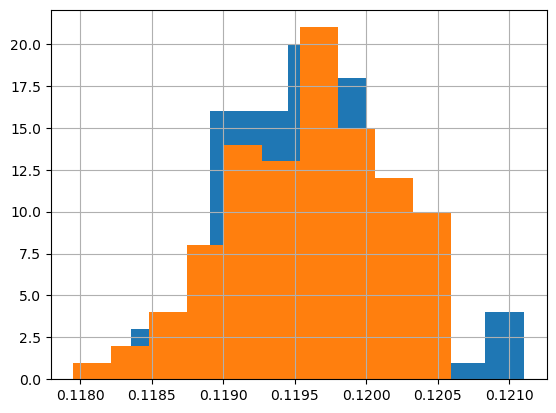

In [35]:
permutation_data["treatment"].hist()
permutation_data["control"].hist()
plt.show()